<a href="https://colab.research.google.com/github/tlacloc/analisis-defunciones-nacimientos-2022/blob/main/2020_analisis_nacimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreria para cargar nuestro drive
from google.colab import drive

# Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Copy of SDC11_actividad1_Badillo_Casanova.ipynb'   SDC_12		 test.ipynb
'EVC Hackathon Files'				    SDC_13		 Untitled0.ipynb
 Image						    SDC_14		 Untitled1.ipynb
 miriam						    SDC_15		 Vero
 SCD_12_Erick_Casanova.ipynb			    test-forvero.ipynb	 Visualizacion


In [ ]:
# Librerias de ayuda
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/miriam/nacimientos_2020.csv', low_memory=False)
df.head(10)

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,2,14,91,29,2,2,25/11/1990,5,2,14,...,11.0,14,91,1,7,NaN,14,91,1,09/01/2020
1,2,27,2,26,2,2,26/03/1993,5,2,27,...,NaN,27,5,74,5,NaN,27,5,1,07/01/2020
2,2,15,104,25,2,2,20/05/1994,4,2,15,...,11.0,15,33,1,2,NaN,15,33,1,11/01/2020
3,2,7,101,22,2,2,26/05/1997,4,2,7,...,11.0,7,101,1,1,NaN,7,101,1,15/01/2020
4,2,20,533,22,2,2,25/09/1997,4,2,20,...,11.0,20,59,1,4,NaN,20,59,1,10/01/2020
5,2,15,63,28,2,2,09/08/1991,5,2,15,...,13.0,15,106,1,2,NaN,15,106,1,07/01/2020
6,2,20,406,17,2,2,06/01/2003,1,2,29,...,14.0,29,25,9999,2,NaN,29,25,9999,06/01/2020
7,2,16,113,22,2,2,14/09/1997,5,2,16,...,11.0,16,69,1,1,MNSSA016533,16,69,1,10/01/2020
8,2,13,42,17,2,2,25/09/2002,4,2,13,...,11.0,13,81,1,4,HGIMO002043,13,81,1,06/01/2020
9,2,7,27,18,2,2,22/02/2001,4,2,7,...,15.0,7,78,1,4,NaN,7,78,1,13/01/2020


In [ ]:
oldColumns = df.columns
oldColumns

Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'LUGARNACIMIENTO', 'CLUES',

Variables que sd van a utilizar

In [ ]:
# Limpieza de datos
# Se eliminaran las columnas que no se utilizaran

columnsToRemove = [
    "TAMIZAUDITIVO",
    "HIJOSSOBREVIVIENTES",
    "FECHANACIMIENTO",
    "ORDENPRODUCTO",
  "NACIOEXTRANJERO",
  "ENTIDADNACIMIENTO",
  "MUNICIPIONACIMIENTO",
  "SECONSIDERAINDIGENA",
  "HABLALENGUAINDIGENA",
  "FECHANACIMIENTOMADRE",
  "RESIDEEXTRANJERO",
  "ESTADOCONYUGAL",
  "ENTIDADRESIDENCIA",
  "MUNICIPIORESIDENCIA",
  "LOCALIDADRESIDENCIA",
  "HIJOSNACIDOSVIVOS",
  "CONDICIONHIJOANTERIOR",
  "VIVEHIJOANTERIOR",
  "ORDENNACIMIENTO",
  "AFILIACION",
  "INTERRUMPIOESTUDIOS",
  "CLAVEOCUPACIONHABITUAL",
  "TRABAJAACTUALMENTE",
  "HORANACIMIENTO",
  "VACUNA_BCG",
  "VACUNAHEPATITIS_B",
  "VITAMINA_A",
  "VITAMINA_K",
  # Relacionado a gemelos
  # "PRODUCTOEMBARAZO",
  "ORDENPRODUCTO",
  # "TOTALPRODUCTOS",
  "CLUES",
  "TIEMPOTRASLADO",
  # "RESOLUCIONEMBARAZO",
  # "UTILIZOFORCEPS",
  "TIPOCESAREA",
  "PERSONALATENDIO",
  "TIPOMEDICOATENDIO",
  "MUNICIPIOPARTO",
  "LOCALIDADPARTO",
  "CERTIFICADOPOR",
  "CLUESCERTIFICA",
  "ENTIDADFEDERATIVACERTIFICA",
  "MUNICIPIOCERTIFICA",
  "LOCALIDADCERTIFICA",
  "FECHACERTIFICADO",
  "LUGARNACIMIENTO"
]

df.drop(columnsToRemove, inplace=True, axis=1)

In [ ]:
columnsToReview = df.columns
columnsToReview

Index(['EDAD', 'NUMEROEMBARAZOS', 'HIJOSNACIDOSMUERTOS', 'ATENCIONPRENATAL',
       'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS', 'SOBREVIVIOPARTO',
       'ESCOLARIDAD', 'EDADPADRE', 'SEXO', 'EDADGESTACIONAL', 'TALLA', 'PESO',
       'APGAR', 'SILVERMAN', 'PRODUCTOEMBARAZO', 'TOTALPRODUCTOS',
       'CODIGOCIEANOMALIA1', 'CODIGOCIEANOMALIA2', 'RESOLUCIONEMBARAZO',
       'UTILIZOFORCEPS', 'ENTIDADFEDERATIVAPARTO'],
      dtype='object')

In [ ]:
#df=df.drop(df[df['EDAD']==999].index)
#df=df.drop(df[df['EDAD']==888].index)
#df=df.drop(df[df['NUMEROEMBARAZOS']==99].index)
#df=df.drop(df[df['HIJOSNACIDOSMUERTOS']==99].index)
#df=df.drop(df[df['ATENCIONPRENATAL']==9].index)
#df=df.drop(df[df['TRIMESTREPRIMERCONSULTA']==9].index)
#df=df.drop(df[df['TOTALCONSULTAS']==99].index)
#df=df.drop(df[df['SOBREVIVIOPARTO']==9].index)
#df=df.drop(df[df['ESCOLARIDAD']==999].index)
#df=df.drop(df[df['EDADPADRE']==999].index)
#df=df.drop(df[df['SEXO']==99].index)
#df=df.drop(df[df['EDADGESTACIONAL']==99].index)
#df=df.drop(df[df['TALLA']==99].index)
#df=df.drop(df[df['PESO']==9999].index)
#df=df.drop(df[df['TALLA']==9].index)
#df=df.drop(df[df['APGAR']==99].index)
#df=df.drop(df[df['SILVERMAN']==99].index)
#df=df.drop(df[df['UTILIZOFORCEPS']==9].index)

In [ ]:
df.head(10)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,29,2,0,1,1,8,1,81,NaN,2,...,3000,9,0,1,NaN,0000,0000,1,8,14
1,26,6,1,1,3,2,1,31,NaN,1,...,9999,0,0,1,NaN,0000,0000,1,8,27
2,25,2,0,1,1,15,1,51,NaN,1,...,3200,9,0,1,NaN,0000,0000,3,8,15
3,22,2,0,1,1,10,1,71,NaN,1,...,3150,9,0,1,NaN,0000,0000,3,8,7
4,22,2,0,1,1,8,1,31,NaN,2,...,3400,9,0,1,NaN,0000,0000,3,8,20
5,28,2,0,1,1,7,1,51,NaN,2,...,1945,9,0,2,NaN,0000,0000,3,8,15
6,17,1,0,1,1,6,1,51,NaN,1,...,3200,9,0,1,NaN,0000,0000,1,8,29
7,22,2,0,1,1,9,1,31,NaN,1,...,3300,9,0,1,NaN,0000,0000,1,8,16
8,17,1,0,1,1,9,1,51,NaN,2,...,2885,9,2,1,NaN,0000,0000,1,8,13
9,18,1,0,1,1,8,1,51,NaN,2,...,3000,9,0,1,NaN,0000,0000,1,8,7


Variable: presencia o ausencia de Malformaciones Craneofaciales MCF

In [ ]:
def update_codes(base_array):
  new_codes = []
  for value in base_array:
    for i in range(0, 10):
      new_codes.append(value[:-1] + str(i))

  return new_codes

In [ ]:
codigos_mc = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150', 'Q160', 'Q170', 'Q180', 'Q300', 'Q350', 'Q360', 'Q370', 'Q380'])
anomalias_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) | df['CODIGOCIEANOMALIA2'].isin(codigos_mc)
mc_df = df[anomalias_mc]
mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
421,28,2,0,1,1,1,1,72,NaN,2,...,2550,9,0,1,NaN,Q170,0000,1,8,9
424,30,4,1,1,1,6,1,51,NaN,1,...,2505,9,0,1,NaN,Q172,Q172,3,8,15
579,33,7,1,1,1,8,1,51,NaN,2,...,3700,9,0,1,NaN,Q386,0000,1,8,15
1488,38,5,3,1,2,6,1,51,NaN,2,...,1115,7,0,1,NaN,K070,Q309,3,8,22
1678,27,1,0,2,0,0,1,71,NaN,1,...,2555,9,2,1,NaN,Q170,0000,1,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746557,24,2,0,1,1,6,1,71,NaN,2,...,3630,9,0,1,NaN,Q369,Q359,3,9,14
1747418,27,2,0,1,1,8,1,71,NaN,1,...,3570,8,0,1,NaN,Q178,0000,1,9,14
1747662,32,1,0,1,1,5,1,51,NaN,2,...,9999,9,0,1,NaN,Q173,Q173,3,9,14
1747698,20,1,0,1,1,6,1,51,NaN,1,...,2500,9,0,1,NaN,Q383,0000,1,9,14


In [ ]:
ttest_ind(df['APGAR'], df['SILVERMAN'])

TtestResult(statistic=895.8512435533083, pvalue=0.0, df=3495692.0)

## Variable categórica clasificación de MCF
- Oftalmológicas Q100 Q110 Q120 Q130 Q140 Q150
- Oído Q160 Q170
- Cara y cuello Q180
- Nariz Q300
- Lengua y boca Q380 Q350 Q360 Q370

### Oftalmo

In [ ]:
# Valores par oftalmo
codigos_oftalmo = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150'])
anomalias_oftalmo = df['CODIGOCIEANOMALIA1'].isin(codigos_oftalmo) | df['CODIGOCIEANOMALIA2'].isin(codigos_oftalmo)
anomalias_oftalmo_df = df[anomalias_oftalmo]
anomalias_oftalmo_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
75201,25,4,0,1,2,5,1,51,NaN,1,...,3350,9,0,1,NaN,Q159,9999,1,8,5
77887,39,5,1,1,1,9,1,51,NaN,2,...,9999,9,0,1,NaN,Q112,0000,3,8,14
91961,25,6,2,1,1,5,1,31,NaN,1,...,3350,9,0,1,NaN,Q111,0000,1,8,15
92130,18,1,0,1,2,2,1,31,NaN,2,...,970,0,5,1,NaN,Q120,Q369,1,8,18
102915,25,4,0,1,1,7,1,51,NaN,2,...,3000,9,0,1,NaN,Q111,Q764,1,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718289,37,6,0,1,1,7,1,51,NaN,2,...,3560,9,0,1,NaN,Q106,0000,1,9,25
1722393,19,3,1,1,1,7,1,32,NaN,2,...,2220,9,0,1,NaN,Q128,0000,1,9,25
1723345,32,5,0,1,1,8,1,51,NaN,1,...,3600,9,0,1,NaN,Q105,0000,3,9,19
1727021,40,1,0,1,1,20,1,101,NaN,2,...,1790,8,3,1,NaN,Q173,Q103,3,9,32


### Oido

In [ ]:
# Valores par oido
codigos_oido = update_codes(['Q160', 'Q170'])
anomalias_oido = df['CODIGOCIEANOMALIA1'].isin(codigos_oido) | df['CODIGOCIEANOMALIA2'].isin(codigos_oido)
anomalias_oido_df = df[anomalias_oido]
anomalias_oido_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
421,28,2,0,1,1,1,1,72,NaN,2,...,2550,9,0,1,NaN,Q170,0000,1,8,9
424,30,4,1,1,1,6,1,51,NaN,1,...,2505,9,0,1,NaN,Q172,Q172,3,8,15
1678,27,1,0,2,0,0,1,71,NaN,1,...,2555,9,2,1,NaN,Q170,0000,1,8,21
2389,22,2,0,1,1,8,1,51,NaN,1,...,2908,9,0,1,NaN,Q172,Q170,1,8,30
4573,16,1,0,1,1,6,1,51,NaN,1,...,3150,9,0,1,NaN,Q174,0000,3,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744082,26,1,0,1,1,9,1,71,NaN,2,...,3080,9,2,1,NaN,Q172,0000,3,9,14
1745410,23,1,0,1,1,9,1,0,NaN,2,...,3350,8,2,1,NaN,Q178,0000,3,9,14
1746165,22,2,0,1,9,4,1,31,NaN,2,...,2950,9,0,1,NaN,Q170,P121,1,9,14
1747418,27,2,0,1,1,8,1,71,NaN,1,...,3570,8,0,1,NaN,Q178,0000,1,9,14


### Cara y cuello

In [ ]:
# Valores par cara y cuello
codigos_cara_cuello = update_codes(['Q180'])
anomalias_cara_cuello = df['CODIGOCIEANOMALIA1'].isin(codigos_cara_cuello) | df['CODIGOCIEANOMALIA2'].isin(codigos_cara_cuello)
anomalias_cara_cuello_df = df[anomalias_cara_cuello]
anomalias_cara_cuello_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
9716,13,1,0,1,2,3,1,31,NaN,2,...,885,8,2,1,NaN,Q189,P071,1,8,21
31700,24,2,0,1,1,6,1,31,NaN,1,...,3250,9,0,1,NaN,Q188,0000,1,8,21
37165,23,1,0,1,1,8,1,71,NaN,2,...,2810,9,0,1,NaN,Q189,Q189,3,8,15
38766,17,1,0,1,1,7,1,51,NaN,1,...,3050,9,2,1,NaN,Q189,0000,3,8,9
89698,25,1,0,1,2,2,1,72,NaN,1,...,900,8,0,1,NaN,Q184,Q184,1,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742489,17,1,0,1,1,8,1,51,NaN,2,...,3510,9,0,1,NaN,Q181,0000,1,0,14
1743497,24,4,2,1,2,3,1,52,NaN,1,...,520,1,0,1,NaN,Q188,Q682,3,9,14
1744231,29,3,1,1,1,15,1,71,NaN,1,...,4250,9,0,1,NaN,Q184,0000,3,9,14
1746470,17,1,0,1,1,6,1,32,NaN,2,...,2750,9,0,1,NaN,Q181,0000,1,0,14


### Nariz

In [ ]:
# Valores para nariz
codigos_nariz = update_codes(['Q300'])
anomalias_nariz = df['CODIGOCIEANOMALIA1'].isin(codigos_nariz) | df['CODIGOCIEANOMALIA2'].isin(codigos_nariz)
anomalias_nariz_df = df[anomalias_nariz]
anomalias_nariz_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1488,38,5,3,1,2,6,1,51,NaN,2,...,1115,7,0,1,NaN,K070,Q309,3,8,22
4561,17,1,0,1,2,5,1,32,NaN,1,...,1630,8,0,1,NaN,Q301,0000,3,8,30
14051,27,4,0,1,1,6,1,52,NaN,1,...,3135,9,0,1,NaN,Q309,0000,1,8,9
73739,22,1,0,1,1,7,1,71,NaN,1,...,2390,8,0,1,NaN,Q309,0000,3,8,15
128572,20,1,0,1,2,3,1,51,NaN,2,...,2690,9,0,1,NaN,Q309,0000,3,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693524,32,2,1,1,1,15,1,0,NaN,2,...,9999,6,0,1,NaN,Q174,Q309,1,9,9
1693553,30,4,3,1,1,4,1,71,NaN,2,...,940,8,3,1,NaN,Q309,Q674,3,9,9
1710689,18,2,0,1,1,7,1,31,NaN,2,...,3221,9,1,1,NaN,Q273,Q300,3,9,14
1726650,21,2,0,1,1,6,1,52,NaN,2,...,3615,7,3,1,NaN,Q870,Q309,3,9,32


### Lengua y boca

In [ ]:
# Valores para lengua y boca
codigos_lengua_boca = update_codes(['Q380', 'Q350', 'Q360', 'Q370'])
anomalias_lengua_boca = df['CODIGOCIEANOMALIA1'].isin(codigos_lengua_boca) | df['CODIGOCIEANOMALIA2'].isin(codigos_lengua_boca)
anomalias_lengua_boca_df = df[anomalias_lengua_boca]
anomalias_lengua_boca_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
579,33,7,1,1,1,8,1,51,NaN,2,...,3700,9,0,1,NaN,Q386,0000,1,8,15
2236,22,2,0,1,1,6,1,51,NaN,2,...,2725,9,0,1,NaN,Q359,9999,3,8,21
3302,18,2,0,1,2,4,1,31,NaN,1,...,2795,9,0,1,NaN,Q379,0000,1,8,31
3456,34,4,1,1,1,9,1,51,NaN,2,...,2800,9,0,1,NaN,Q709,Q353,1,8,14
4863,38,1,0,1,2,8,1,31,NaN,1,...,4000,9,0,1,NaN,Q379,Q379,3,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744458,36,4,1,1,1,6,1,31,NaN,2,...,3050,9,1,1,NaN,Q369,Q373,3,9,14
1745827,30,3,0,1,1,6,1,51,NaN,1,...,3290,9,10,1,NaN,Q381,0000,3,9,14
1746398,28,4,0,1,1,11,1,51,NaN,1,...,3575,9,0,1,NaN,Q383,0000,3,9,14
1746557,24,2,0,1,1,6,1,71,NaN,2,...,3630,9,0,1,NaN,Q369,Q359,3,9,14


# PX sanos

los sanos son los que no tienen nada o 0000 en anomalia 1 o 2

In [ ]:
nmc = (df['CODIGOCIEANOMALIA1'] == '0000') & (df['CODIGOCIEANOMALIA2'] == '0000')
nmc_df = df[nmc]
nmc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,29,2,0,1,1,8,1,81,NaN,2,...,3000,9,0,1,NaN,0000,0000,1,8,14
1,26,6,1,1,3,2,1,31,NaN,1,...,9999,0,0,1,NaN,0000,0000,1,8,27
2,25,2,0,1,1,15,1,51,NaN,1,...,3200,9,0,1,NaN,0000,0000,3,8,15
3,22,2,0,1,1,10,1,71,NaN,1,...,3150,9,0,1,NaN,0000,0000,3,8,7
4,22,2,0,1,1,8,1,31,NaN,2,...,3400,9,0,1,NaN,0000,0000,3,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747840,27,2,0,1,1,5,1,51,NaN,1,...,3370,9,0,1,NaN,0000,0000,3,9,14
1747841,25,1,0,1,9,6,1,71,NaN,2,...,2940,9,0,1,NaN,0000,0000,3,9,14
1747843,30,1,0,1,2,16,1,81,NaN,1,...,3000,9,0,1,NaN,0000,0000,2,2,14
1747844,27,1,0,1,1,9,1,82,NaN,2,...,3820,10,0,1,NaN,0000,0000,3,9,14


### Variable segunda malformacion

In [ ]:
codigos_mc
primer_anomalia_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & (df['CODIGOCIEANOMALIA2'] == '0000')
primer_anomalia_mc_df = df[primer_anomalia_mc]
primer_anomalia_mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
421,28,2,0,1,1,1,1,72,NaN,2,...,2550,9,0,1,NaN,Q170,0000,1,8,9
579,33,7,1,1,1,8,1,51,NaN,2,...,3700,9,0,1,NaN,Q386,0000,1,8,15
1678,27,1,0,2,0,0,1,71,NaN,1,...,2555,9,2,1,NaN,Q170,0000,1,8,21
3302,18,2,0,1,2,4,1,31,NaN,1,...,2795,9,0,1,NaN,Q379,0000,1,8,31
4561,17,1,0,1,2,5,1,32,NaN,1,...,1630,8,0,1,NaN,Q301,0000,3,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746470,17,1,0,1,1,6,1,32,NaN,2,...,2750,9,0,1,NaN,Q181,0000,1,0,14
1746526,22,3,1,1,1,3,1,81,NaN,1,...,3730,7,3,1,NaN,Q181,0000,1,9,14
1747418,27,2,0,1,1,8,1,71,NaN,1,...,3570,8,0,1,NaN,Q178,0000,1,9,14
1747698,20,1,0,1,1,6,1,51,NaN,1,...,2500,9,0,1,NaN,Q383,0000,1,9,14


# Variable segunda malformación craneofacial
Tiene dos malformaciones. Una malformación craneofacial puede estar en la primera y/o en la segunda columna.

In [ ]:
mc_2_df = mc_df[mc_df.CODIGOCIEANOMALIA1 != '0000']
mc_2_df = mc_2_df[mc_2_df.CODIGOCIEANOMALIA2 != '0000']
mc_2_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
424,30,4,1,1,1,6,1,51,NaN,1,...,2505,9,0,1,NaN,Q172,Q172,3,8,15
1488,38,5,3,1,2,6,1,51,NaN,2,...,1115,7,0,1,NaN,K070,Q309,3,8,22
2236,22,2,0,1,1,6,1,51,NaN,2,...,2725,9,0,1,NaN,Q359,9999,3,8,21
2389,22,2,0,1,1,8,1,51,NaN,1,...,2908,9,0,1,NaN,Q172,Q170,1,8,30
3456,34,4,1,1,1,9,1,51,NaN,2,...,2800,9,0,1,NaN,Q709,Q353,1,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744357,36,6,1,1,1,4,1,51,NaN,1,...,9999,8,0,1,NaN,Q369,9999,3,8,14
1744458,36,4,1,1,1,6,1,31,NaN,2,...,3050,9,1,1,NaN,Q369,Q373,3,9,14
1746165,22,2,0,1,9,4,1,31,NaN,2,...,2950,9,0,1,NaN,Q170,P121,1,9,14
1746557,24,2,0,1,1,6,1,71,NaN,2,...,3630,9,0,1,NaN,Q369,Q359,3,9,14


#Variable segunda malformacion craneofacial
Una sola malformacion craneofacial esta en cualquier columna

In [ ]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
    | (mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc))
]



,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1488,38,5,3,1,2,6,1,51,NaN,2,...,1115,7,0,1,NaN,K070,Q309,3,8,22
2236,22,2,0,1,1,6,1,51,NaN,2,...,2725,9,0,1,NaN,Q359,9999,3,8,21
3456,34,4,1,1,1,9,1,51,NaN,2,...,2800,9,0,1,NaN,Q709,Q353,1,8,14
6194,27,2,0,1,1,7,1,71,NaN,2,...,3000,9,0,1,NaN,Q173,9999,3,8,15
7054,38,3,0,1,1,8,1,71,NaN,2,...,3300,9,0,1,NaN,Q359,Q699,1,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740580,29,3,1,1,1,9,1,71,NaN,2,...,2978,9,1,1,NaN,Q650,Q174,3,8,9
1741344,28,2,0,1,3,3,1,51,NaN,1,...,3240,7,0,1,NaN,Q181,9999,3,8,14
1743497,24,4,2,1,2,3,1,52,NaN,1,...,520,1,0,1,NaN,Q188,Q682,3,9,14
1744357,36,6,1,1,1,4,1,51,NaN,1,...,9999,8,0,1,NaN,Q369,9999,3,8,14


# Variable segunda malformacion craneofacial
Tiene dos malformaciones craneofaciales, una en cada columna.

In [ ]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
]


,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
424,30,4,1,1,1,6,1,51,NaN,1,...,2505,9,0,1,NaN,Q172,Q172,3,8,15
2389,22,2,0,1,1,8,1,51,NaN,1,...,2908,9,0,1,NaN,Q172,Q170,1,8,30
4863,38,1,0,1,2,8,1,31,NaN,1,...,4000,9,0,1,NaN,Q379,Q379,3,8,20
8209,22,1,0,1,1,6,1,71,NaN,1,...,9999,9,0,1,NaN,Q359,Q359,1,8,8
9431,29,2,0,1,2,4,1,101,NaN,2,...,3375,9,0,1,NaN,Q173,Q173,3,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732315,34,2,1,1,1,8,1,81,NaN,1,...,2310,8,3,1,NaN,Q174,Q174,3,8,9
1735773,27,1,0,1,1,9,1,81,NaN,2,...,2440,8,2,1,NaN,Q172,Q172,1,8,9
1744458,36,4,1,1,1,6,1,31,NaN,2,...,3050,9,1,1,NaN,Q369,Q373,3,9,14
1746557,24,2,0,1,1,6,1,71,NaN,2,...,3630,9,0,1,NaN,Q369,Q359,3,9,14


# Edad materna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [ ]:
etiqueta = 'EDAD'

edades_madres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]
edades_madres

[553, 2004, 1102, 112, 0]

# Edad paterna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [ ]:
etiqueta = 'EDADPADRE'
edades_padres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]

edades_padres

[42, 322, 206, 56, 56]

In [ ]:
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'Edad madres': edades_madres, 'Edad padres': edades_padres, 'labels': labels},
                  index=labels)

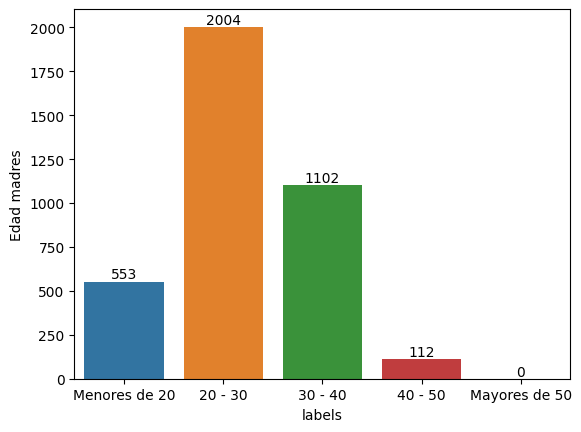

In [ ]:
ax = sns.barplot(edadesDF, y='Edad madres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

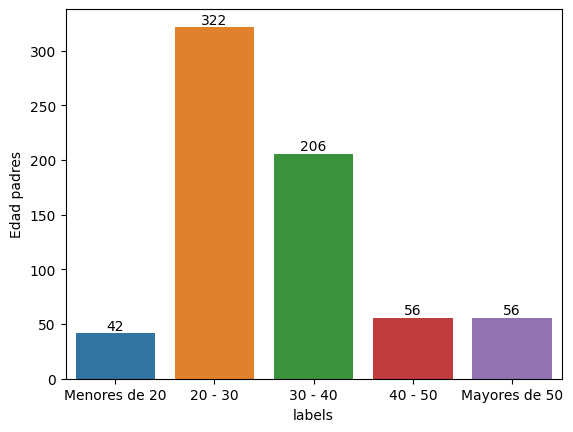

In [ ]:
ax = sns.barplot(edadesDF, y='Edad padres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

# Numero de embarazos
Primigesta (1 embarazo)
Multigesta (2 a 5 embarazos)
Gran multigesta (6 o más embarazos)

In [ ]:
etiqueta = 'NUMEROEMBARAZOS'
numero_embarazos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2) & (mc_df[etiqueta] < 6)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 6
    ])
]
numero_embarazos

[1323, 2353, 95]

#Hijos nacidos muertos
Sí o no

In [ ]:
etiqueta = 'HIJOSNACIDOSMUERTOS'
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] >= 1 # un hijo o mas
    ]),
    len(mc_df[
        mc_df[etiqueta] == 0 # ningun hijo
    ])
]
hijos_nacidos_muertos

[770, 3001]

# Madre sobrevivio parto SOBREVIVIOPARTO
* Si 1
* No 2
* no aplica, se ignora, no especificado 0, 8, 9


In [ ]:
etiqueta = 'SOBREVIVIOPARTO'
no_especificado = [0, 8, 9]
sobrevivio_parto = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
     len(mc_df[
        mc_df[etiqueta].isin(no_especificado)
    ])
]
sobrevivio_parto

[3769, 0, 2]

#Madre recibio atencion prenatal
* Si 1
* No 2
* no aplica, se ignora, no especificado 0, 8, 9

In [ ]:
etiqueta = 'ATENCIONPRENATAL'
no_especificado = [0, 8, 9]
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
     len(mc_df[
        mc_df[etiqueta].isin(no_especificado)
    ])
]
hijos_nacidos_muertos


[3658, 101, 12]

#Trimestre de primer consulta
Trimestre 1
Trimestre 2
Trimestre 3

In [ ]:
etiqueta = 'TRIMESTREPRIMERCONSULTA'
trimestre_primer_consulta = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ])
]
trimestre_primer_consulta

[2844, 657, 106]

# Total de consulta durante el embarazo
Suficiente (5 o mas citas)
Insuficiente (1-4 citas)
No recibió (0 citas)

In [ ]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] < 5)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 5
    ])
]
total_consultas_durante_embarazo

[100, 568, 3103]

# Numeros de consultas durante el embarazo
0
1
2
3
4
5
Más de 5

In [ ]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ]),
    len(mc_df[
        mc_df[etiqueta] == 4
    ]),
    len(mc_df[
        mc_df[etiqueta] == 5
    ]),
    len(mc_df[
        mc_df[etiqueta] > 5
    ])
]
total_consultas_durante_embarazo

[100, 55, 74, 171, 268, 420, 2683]

#Escolaridad materna
Ninguno (0, 1, 32, 88, 99)
Primaria completa (31, 52, 112)
Secundaria completa (51, 72)
Bachillerato o preparatoria completa (71, 82)
Licenciatura completa (81, 102)
Posgrado (101)
Tecnico terminal (111, 131, 132)


In [ ]:
etiqueta = 'ESCOLARIDAD'
ninguno = [0, 1, 32, 88, 99]
primaria_completa = [31, 52, 112]
secundaria_completa = [51, 72]
bachiller = [71, 82]
licenciatura = [81, 102]
posgrado = [101]
tecnico = [111, 131, 132]
escolaridad_materna = [
    len(
        mc_df[mc_df[etiqueta].isin(ninguno)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(primaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(secundaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(bachiller)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(licenciatura)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(posgrado)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(tecnico)]
    )
]

escolaridad_materna

[232, 446, 1460, 1006, 566, 50, 11]

# Entidad federativa de parto ENTIDADFEDERATIVAPARTO
df.agg(['count', 'size', 'nunique'])


In [ ]:
tmp = mc_df.groupby('ENTIDADFEDERATIVAPARTO').agg(['count', 'size', 'nunique']).stack()

# Sexo del recien nacido SEXO
* Hombre 1
* mujer 2
* no especificado 0,9

In [ ]:
etiqueta = 'SEXO'
sexo_mc_df = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0) | (mc_df[etiqueta] == 9)
    ])
]
sexo_mc_df

[2084, 1680, 7]

# Edad gestacional EDADGESTACIONAL
* pretermino =<36 semanas
* termino 37-41 semanas
* postermino =>42 semanas

In [ ]:
etiqueta = 'EDADGESTACIONAL'
edad_gestacional_mc_df = [
    len(mc_df[
        mc_df[etiqueta] <= 36
    ]),
    len(mc_df[
        (mc_df[etiqueta] > 36) & (mc_df[etiqueta] < 42)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 42)
    ])
]
edad_gestacional_mc_df

[531, 3199, 41]

# Peso del recien nacido PESO
* bajo peso =<2499gr
* normopeso 2500-3999gr
* macrosomico =>4000 gr

In [ ]:
etiqueta = 'PESO'
peso_mc_df = [
    len(mc_df[
        mc_df[etiqueta] < 2500
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2500) & (mc_df[etiqueta] < 4000)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4000)
    ])
]
peso_mc_df

[434, 2936, 401]

# Talla del recien nacido TALLA
* segun formula OMS luego averiguamos

# Puntaje escala APGAR a los 5 minutos de recien nacido con MCF APGAR
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [ ]:
etiqueta = 'APGAR'
apgar_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 0) & (mc_df[etiqueta] <= 3)
    ])
]
apgar_mc_df

[3660, 56, 47]

# Puntaje escala APGAR a los 5 minutos de poblacion sana APGAR
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [ ]:
etiqueta = 'APGAR'
apgar_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 0) & (nmc_df[etiqueta] <= 3)
    ])
]
apgar_nmc_df

[1630227, 5214, 12286]

# Puntaje escala Silverman Anderson en recien nacidos con MCF SILVERMAN
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos

In [ ]:
etiqueta = 'SILVERMAN'
silverman_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] <= 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ])
]
silverman_mc_df

[3018, 658, 49, 24]

# Puntaje escala Silverman Anderson de poblacion sana SILVERMAN
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos


In [ ]:
etiqueta = 'SILVERMAN'
silverman_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] == 0)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 1) & (nmc_df[etiqueta] <= 3)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ])
]
silverman_nmc_df

[1486105, 136517, 5819, 16147]

# Tipo de producto embarazo PRODUCTOEMBARAZO
* unico 1
* multiple 2, 3
* no especificado 0

In [ ]:
etiqueta = 'PRODUCTOEMBARAZO'
producto_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2) | (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ])
]
producto_embarazo_mc_df

[3689, 70, 12]

# Total productos extraidos TOTALPRODUCTOS
* 1
* 2
* 3
* 4 o mas


etiqueta = 'TOTALPRODUCTOS'

In [ ]:
etiqueta='TOTALPRODUCTOS'
total_productos_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
    (mc_df[etiqueta] == 4) | (mc_df[etiqueta] == 8)
    ])
]
total_productos_mc_df

[0, 16, 0, 0]

# Procedimiento utilizado para resolucion del embarazo RESOLUCIONEMBARAZO
* no especificado 0
* eutocico 1
* distocico 2
* cesarea 3
* otro 8

In [ ]:
etiqueta = 'RESOLUCIONEMBARAZO'
resolucion_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 8)
    ])
]
resolucion_embarazo_mc_df

[18, 1592, 55, 2104, 2]

# Utilizo forceps UTILIZO FORCEPS
* no especificado, otro, no aplica, se ignora 0, 3, 8, 9
* si 1
* no 2

In [ ]:
etiqueta = 'UTILIZOFORCEPS'
no_aplica = [0, 3, 8, 9]
utilizo_forceps_mc_df = [
    len(mc_df[
        (mc_df[etiqueta].isin(no_aplica))
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ])
]
utilizo_forceps_mc_df

[3705, 22, 44]

In [ ]:
df.max()

EDAD                        999
NUMEROEMBARAZOS              99
HIJOSNACIDOSMUERTOS          99
ATENCIONPRENATAL              9
TRIMESTREPRIMERCONSULTA       9
TOTALCONSULTAS               99
SOBREVIVIOPARTO               9
ESCOLARIDAD                 132
EDADPADRE                  99.0
SEXO                          9
EDADGESTACIONAL              99
TALLA                        99
PESO                       9999
APGAR                        99
SILVERMAN                    99
PRODUCTOEMBARAZO              3
TOTALPRODUCTOS              5.0
CODIGOCIEANOMALIA1         Z208
CODIGOCIEANOMALIA2         Z208
RESOLUCIONEMBARAZO            8
UTILIZOFORCEPS                9
ENTIDADFEDERATIVAPARTO       99
dtype: object

# medidas descriptivas

In [ ]:
mc_df=mc_df.drop(mc_df[mc_df['EDAD']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['EDAD']==888].index)
mc_df=mc_df.drop(mc_df[mc_df['NUMEROEMBARAZOS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['HIJOSNACIDOSMUERTOS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['ATENCIONPRENATAL']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['TRIMESTREPRIMERCONSULTA']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['TOTALCONSULTAS']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['SOBREVIVIOPARTO']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['ESCOLARIDAD']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['EDADPADRE']==999].index)
mc_df=mc_df.drop(mc_df[mc_df['SEXO']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['EDADGESTACIONAL']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['TALLA']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['PESO']==9999].index)
mc_df=mc_df.drop(mc_df[mc_df['TALLA']==9].index)
mc_df=mc_df.drop(mc_df[mc_df['APGAR']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['SILVERMAN']==99].index)
mc_df=mc_df.drop(mc_df[mc_df['UTILIZOFORCEPS']==9].index)

In [ ]:
mc_df.describe().applymap('{:,.2f}'.format)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
count,"2,407.00","2,407.00","2,407.00","2,407.00","2,407.00","2,407.00","2,407.00","2,407.00",607.00,"2,407.00","2,407.00","2,407.00","2,407.00","2,407.00","2,407.00","2,407.00",15.00,"2,407.00","2,407.00","2,407.00"
mean,26.37,2.26,0.26,1.03,1.27,7.08,1.00,59.80,33.21,1.44,38.32,49.18,"3,028.57",8.78,0.35,1.01,2.00,2.14,7.82,16.53
std,6.49,1.38,0.58,0.17,0.80,3.35,0.03,19.20,17.88,0.52,2.12,3.25,535.29,0.99,1.04,0.14,0.00,1.00,1.09,7.59
min,10.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,22.00,26.00,500.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00
25%,21.00,1.00,0.00,1.00,1.00,5.00,1.00,51.00,24.00,1.00,38.00,48.00,"2,765.00",9.00,0.00,1.00,2.00,1.00,8.00,11.00
50%,26.00,2.00,0.00,1.00,1.00,7.00,1.00,52.00,28.00,1.00,39.00,50.00,"3,070.00",9.00,0.00,1.00,2.00,3.00,8.00,15.00
75%,31.00,3.00,0.00,1.00,1.00,9.00,1.00,72.00,36.00,2.00,40.00,51.00,"3,367.50",9.00,0.00,1.00,2.00,3.00,8.00,21.00
max,49.00,13.00,4.00,2.00,8.00,30.00,1.00,131.00,99.00,9.00,42.00,60.00,"4,450.00",10.00,10.00,2.00,2.00,8.00,8.00,32.00


In [ ]:
mc_df.mode(numeric_only=True)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,25,1,0,1,1,8,1,51,28.0,1,39,50,3000,9,0,1,2.0,3,8,15


## Agrupando por edades

In [ ]:
edades = [
    len(df[df['EDAD'] < 20]),
    len(df[(df['EDAD'] >= 20) & (df['EDAD'] < 30)]),
    len(df[(df['EDAD'] >= 30) & (df['EDAD'] < 40)]),
    len(df[(df['EDAD'] >= 40) & (df['EDAD'] < 50)]),
    len(df[df['EDAD'] >= 50])
]
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'edades': edades, 'labels': labels},
                  index=labels)

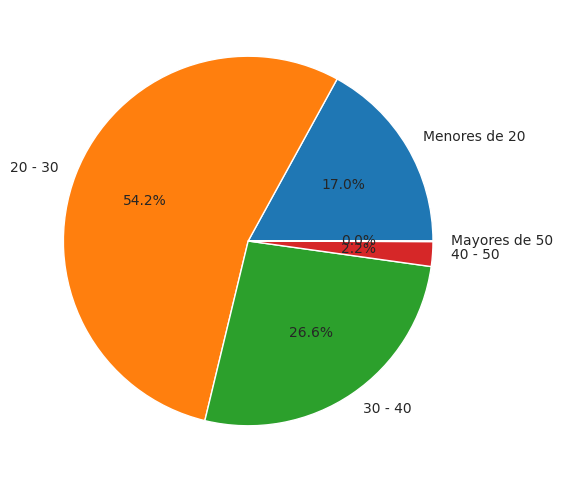

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(edadesDF['edades'], labels=edadesDF['labels'], autopct='%1.1f%%')
plt.show()

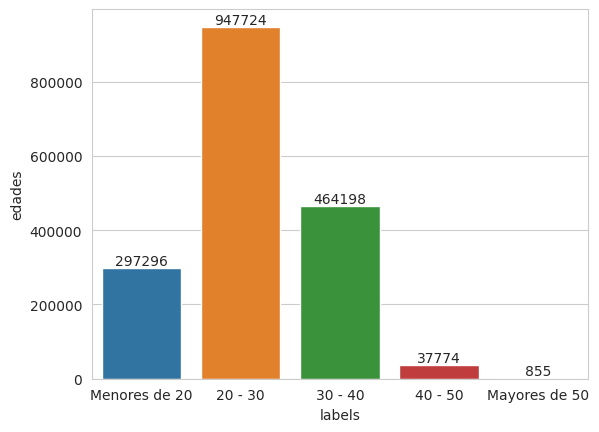

In [ ]:
ax = sns.barplot(edadesDF, y='edades', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);